# We List Houses
July 31, 2019<br>Sean Carver & Ngoc Tran

-----------------------------------------------------------------

In this notebook, we will showcase our best linear and logistic models as well as our seasonal decomposition.

---------------------------------

# Import

In [1]:
%matplotlib inline

import os
import pylab
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from pathlib import Path
from sklearn.metrics import mean_squared_error

sns.set_style("whitegrid")

Change directory to get source code:

In [2]:
main_path = os.getcwd()
parent_path = Path(os.getcwd()).parent
src_path = str(parent_path) + "/src/data"
os.chdir(src_path)

More import:

In [3]:
import change_directory

Change back to notebook directory:

In [4]:
os.chdir(main_path)

# Load data

Change directory to get data:

In [5]:
cd = change_directory.ChangeDirectory()
cd.change_to_data_dir()

Load data:

In [6]:
properties = pd.read_csv("processed/Processed_DC_Properties.csv")

Change back to notebook directory:

In [7]:
cd.change_to_notebook_dir()

# Modeling

## Linear Regression Model

X and y:

In [8]:
y = properties["log(PRICE)"]
X = properties.drop(["SALEDATE", "PRICE", "log(PRICE)", "SOLD_1_MIL_OR_MORE"], axis=1)

Change directory to get model:

In [9]:
cd.change_to_model_dir()

Load model:

In [10]:
with open("linear_regression_model.pickle", "rb") as file:
    lm = pickle.load(file)

Change back to notebook directory:

In [11]:
cd.change_to_notebook_dir()

Run model:

In [12]:
y_pred = lm.predict(X)
residuals = y - y_pred

In [13]:
print("R_squared:                  ", lm.score(X, y))
print("Root mean squared error:    ", np.sqrt(mean_squared_error(y, y_pred)))

R_squared:                   0.8581932801843727
Root mean squared error:     0.2787028005520307


Test residuals:

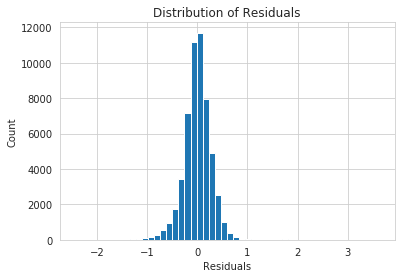

In [14]:
residuals.hist(bins=50)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

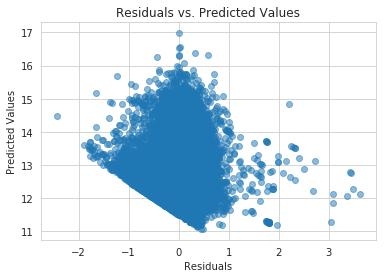

In [15]:
plt.scatter(residuals, y_pred, alpha=0.5)
plt.xlabel("Residuals")
plt.ylabel("Predicted Values")
plt.title("Residuals vs. Predicted Values")
plt.show()

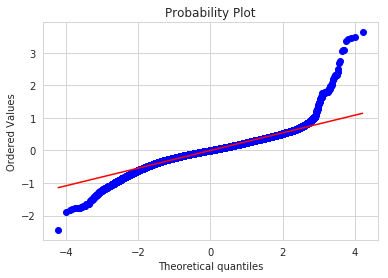

In [16]:
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

Thoughts:
- Error assumptions are violated.
- Further EDA will need to be performed for better feature engineering.
- More advanced Machine Learning algorithms can produce better results.

# Logistic Model and Model Selection

Using the logistic model we find that a model with dummy variables for number of rooms of various types fit substantially better than an alternative model with quantitative variables for those quantities.  Delta AIC = 1960.7685314010923.

See notebooks 3.0, 4.0, and 5.0.  


Also using the logistic model with all features above we find that the model that includes sale date fits substantially better than the model that does not include this feature.  Delta AIC = 829.8018031223733.

See notebooks 6.0, 7.0, and 8.0.

# Seasonal Decomposition